In [11]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi, sqrt

In [21]:
dt_array = np.linspace(0.0001, 0.001, 100)
omega_array = np.linspace(1, 2*pi, 100)
t_array = np.linspace(0.0001, 0.1, 100)

In [22]:
dt_data = (1 - np.sqrt(2 - 2 * np.cos(0.5 * pi * dt_array))/(0.5 * pi * dt_array)) * 0.5 * pi * 0.01
omega_data = (1 - np.sqrt(2 - 2 * np.cos(omega_array * 0.001))/(omega_array * 0.001)) * omega_array *0.01
t_data = (1 - np.sqrt(2 - 2 * np.cos(0.5 * pi * 0.001))/(0.5 * pi * 0.001)) * 0.5 * pi * t_array

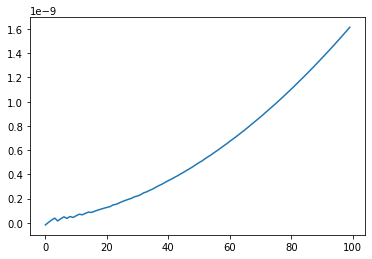

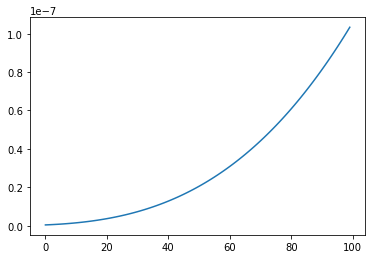

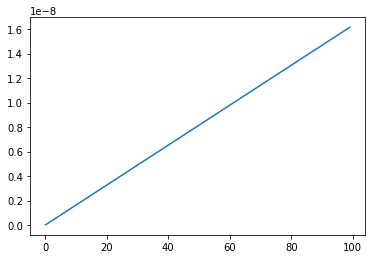

In [23]:
plt.plot(dt_data)
plt.show()
plt.plot(omega_data)
plt.show()
plt.plot(t_data)
plt.show()

In [19]:
a = np.linspace(1,100,100)
b = (np.cos(100-a))/a

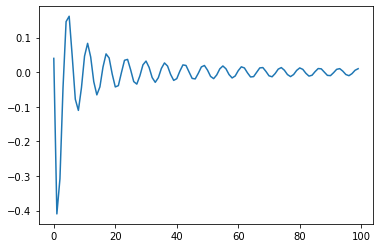

In [20]:
plt.plot(b)

In [35]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\Forward")

from Modeling import *

In [38]:
# a test model
xmax = 1000
zmax = 1000
nx = 201
nz = 201
tmax = 0.4
nt = 800
dt = tmax/nt
f_m = 30

pmodel = 3000 * np.ones((nx, nz), dtype=float)
vpmodel = 2500 * np.ones((nx, nz), dtype=float)
vsmodel = 1400 * np.ones((nx, nz), dtype=float)

source_position = [100, 100]
source_direction = 'x'

# 30Hz ricker wavelet
# f(t)=(1-2*pi^2*f_m^2*t^2)e^(-pi^2*f_m^2*t^2)
source_array = np.zeros(int(0.04/dt)+1)
for tk , t in enumerate(np.arange(0, 0.04, dt)):
    #print(t,tk)
    source_array[tk] = (1 - 2 * (pi * f_m * t)**2) * exp(-(pi * f_m * t) ** 2)

In [39]:
test = FirstOlder_NPML(pmodel, vpmodel, vsmodel, tmax, xmax, zmax, nt, nx, nz, 10)

In [40]:
test.o2xFM(wavelet=source_array, wavalet_position=source_position, wavalet_direction=source_direction)

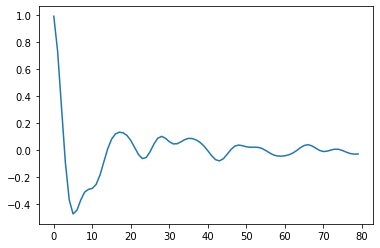

In [49]:
source_vib = test._vx[100,100,1:81]
other_place_vib = test._vx[80,80,:]
plt.plot(source_vib)
#plt.plot(other_place_vib*30)
plt.show()

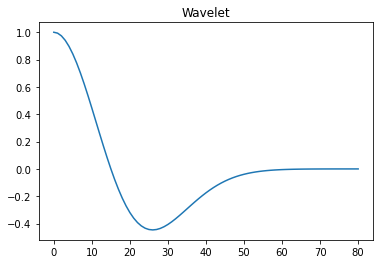

In [50]:
plt.plot(source_array)
plt.title('Wavelet')
plt.show()